In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv('boston.csv')

In [10]:
df.head()

CRIM    ZN  INDUS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  HOUSEPRICE  
0  396.90   4.98        24.0  
1  396.90   9.14        21.6  
2  392.83   4.03        34.7  
3  394.63   2.94        33.4  
4  396.90   5.33        36.2

In [11]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'HOUSEPRICE'],
      dtype='object')

In [12]:
df.shape

(506, 13)

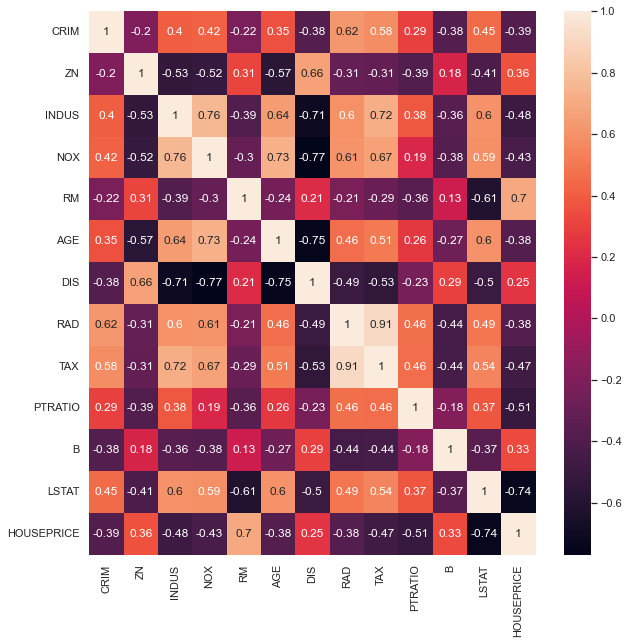

In [13]:
sns.set(rc={'figure.figsize':(10,10)})
sns.heatmap(df.corr(), annot = True);

In [14]:
df.isnull().sum()

CRIM          0
ZN            0
INDUS         0
NOX           0
RM            0
AGE           0
DIS           0
RAD           0
TAX           0
PTRATIO       0
B             0
LSTAT         0
HOUSEPRICE    0
dtype: int64

In [15]:
df[df.duplicated()]

Empty DataFrame
Columns: [CRIM, ZN, INDUS, NOX, RM, AGE, DIS, RAD, TAX, PTRATIO, B, LSTAT, HOUSEPRICE]
Index: []

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='RM', ylabel='HOUSEPRICE'>

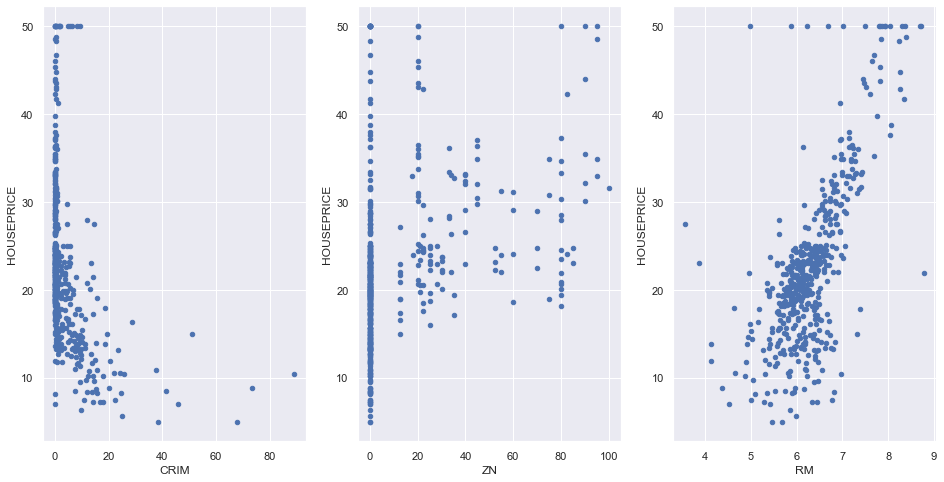

In [17]:
fig, axs = plt.subplots(1, 3)   #(rows,cols)
df.plot(kind='scatter', x='CRIM', y='HOUSEPRICE', ax=axs[0], figsize=(16,8))
df.plot(kind='scatter', x='ZN', y='HOUSEPRICE', ax=axs[1])
df.plot(kind='scatter', x='RM', y='HOUSEPRICE', ax=axs[2])

In [18]:
feature_cols = ['RM']
x = df[feature_cols] # Features
y = df.HOUSEPRICE

In [19]:
from sklearn.model_selection import train_test_split

In [41]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state = 10)

In [42]:
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(379, 1)
(379,)
(127, 1)
(127,)


In [43]:
from sklearn.linear_model import LinearRegression

In [44]:
my_first_model = LinearRegression()

In [45]:
my_first_model.fit(X_train,y_train)

LinearRegression()

In [46]:
my_first_model.coef_

array([8.92604435])

In [47]:
my_first_model.intercept_

-33.874776606075

### Interpreting the coefficients

1. A unit increase in TV ad spending was associated with a .048 unit increase in Sales

### Inference
y = mx + c

You have the values of m and c. Given any value of x you can predict the value of y



In [48]:
8.92*6.115-33.87

20.675800000000002

In [49]:
Pred = my_first_model.predict(X_test)

In [50]:
X_test

RM
305  6.616
193  6.800
65   6.290
349  6.939
151  5.404
..     ...
493  5.707
142  5.403
26   5.813
173  6.416
428  6.193

[127 rows x 1 columns]

In [51]:
Pred

array([25.17993284, 26.822325  , 22.27004238, 28.06304516, 14.36156708,
       23.57324485, 32.97236956, 16.44133542, 18.96740597, 37.89062   ,
       20.81509715, 27.5274825 , 20.9668399 , 27.30433139, 27.05440215,
       41.08614388, 23.52861463, 16.14677595, 19.8600104 , 20.83294924,
       28.09874934, 22.72527064, 21.94870478, 23.38579792, 30.19636976,
       18.51217771, 21.21676914, 22.36822887, 34.36483248,  7.43495666,
       29.56262061, 30.0624791 , 24.2873284 , 21.56488487, 24.00169498,
       17.84272438, 19.10129663, 29.92858843, 20.77046693, 23.29653748,
       34.7308003 , 25.19778493, 23.28761143, 25.07282031, 19.94927085,
       25.89401639, 21.92192665, 21.72555367, 35.92689024, 19.00311014,
       18.37828704, 23.29653748, 19.51189467, 35.92689024, 26.76876873,
       30.41952087, 17.28038358, 20.68120648, 10.51444196, 31.40138575,
       22.59137997, 21.25247332, 40.88084486, 43.81751345, 24.55510973,
       21.02932221, 20.2616824 ,  5.11418513, 24.70685249, 39.84

In [52]:
y_test

305    28.4
193    31.1
65     23.5
349    26.6
151    19.6
       ... 
493    21.8
142    13.4
26     16.6
173    23.6
428    11.0
Name: HOUSEPRICE, Length: 127, dtype: float64

In [53]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [54]:
my_linear_preds_train = my_first_model.predict(X_train)
print('MAE on Train Data :', mean_absolute_error(my_linear_preds_train,y_train))
print('MSE on Train Data :', mean_squared_error(my_linear_preds_train,y_train))
print('RMSE on Train Data :', np.sqrt(mean_squared_error(my_linear_preds_train,y_train)))
print('R-squared on Train Data :', my_first_model.score(X_train, y_train))

MAE on Train Data : 4.337103417732701
MSE on Train Data : 42.101199291945704
RMSE on Train Data : 6.4885436957722415
R-squared on Train Data : 0.45936480600678


In [56]:
my_model_preds = my_first_model.predict(X_test)
print('MAE on Test Data :', mean_absolute_error(my_model_preds,y_test))
print('MSE on Test Data :', mean_squared_error(my_model_preds,y_test))
print('RMSE on Test Data :', np.sqrt(mean_squared_error(my_model_preds,y_test)))
print('R-squared on Test Data :', my_first_model.score(X_test, y_test))

MAE on Test Data : 4.878363654562126
MSE on Test Data : 48.5203614592509
RMSE on Test Data : 6.965655852771575
R-squared on Test Data : 0.5132766885089004


### Multiple Linear Regression

In [63]:
feature_cols = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']
x = df[feature_cols] # Features
y = df.HOUSEPRICE

In [64]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state = 10)

In [65]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(379, 12)
(127, 12)
(379,)
(127,)


In [66]:
my_multiple_linear_model = LinearRegression()

In [67]:
my_multiple_linear_model.fit(X_train,y_train)

LinearRegression()

In [68]:
my_multiple_linear_model.coef_

array([-1.27592053e-01,  5.76090649e-02, -8.93345498e-03, -1.52226651e+01,
        3.51566445e+00,  1.27647889e-02, -1.47322938e+00,  3.00574892e-01,
       -1.26892804e-02, -8.57984741e-01,  1.27776413e-02, -5.43412798e-01])

In [69]:
my_multiple_linear_model.intercept_

33.81593032096568

In [70]:
Pred1 = my_multiple_linear_model.predict(X_test)

In [71]:
Pred1

array([31.21557448, 31.85554025, 30.57800854, 22.3857333 , 19.04653018,
       16.3229923 , 36.44980072, 14.69183524, 23.3537603 , 37.50117051,
       21.303579  , 29.49084622, 28.04017458, 33.93299617, 32.08235109,
       41.06894999, 24.35308004, 23.38060463, 25.57179525, 20.05953126,
       33.08826917, 17.8855264 , 25.45703794, 25.10160895, 32.58028876,
       20.51853902, 19.80977409, 17.02187837, 37.18217515,  0.54610774,
       32.40458217, 32.37910556, 25.77857683, 23.9891508 , 20.62320511,
       19.57716523,  3.77513764, 34.8163541 , 27.03229671, 27.71791466,
       34.58993963, 29.96329337, 18.45729221, 31.42124607, 18.20357369,
       28.27282217, 19.40162226, 21.83169086, 38.47482786, 16.4740234 ,
       24.82950695, 19.60562526, 24.59102931, 34.56345059, 26.80347633,
       35.07738227, 20.95299128, 19.75725226, 18.53137292, 25.15779898,
       19.98774599, 23.53135541, 38.63073053, 43.2581473 , 30.43260267,
       16.97595761, 23.9074021 ,  3.27449704, 31.61728587, 29.12

In [72]:
y_test

305    28.4
193    31.1
65     23.5
349    26.6
151    19.6
       ... 
493    21.8
142    13.4
26     16.6
173    23.6
428    11.0
Name: HOUSEPRICE, Length: 127, dtype: float64

In [73]:
my_multiple_linear_preds_train = my_multiple_linear_model.predict(X_train)
print('MAE on Train Data :', mean_absolute_error(my_multiple_linear_preds_train,y_train))
print('MSE on Train Data :', mean_squared_error(my_multiple_linear_preds_train,y_train))
print('RMSE on Train Data :', np.sqrt(mean_squared_error(my_multiple_linear_preds_train,y_train)))
print('R-squared on Train Data :', my_multiple_linear_model.score(X_train, y_train))


MAE on Train Data : 3.058607514505977
MSE on Train Data : 18.962776310318283
RMSE on Train Data : 4.354627000136554
R-squared on Train Data : 0.7564928215443916


In [74]:
my_multiple_linear_preds = my_multiple_linear_model.predict(X_test)
print('MAE on Test Data :', mean_absolute_error(my_multiple_linear_preds,y_test))
print('MSE on Test Data :', mean_squared_error(my_multiple_linear_preds,y_test))
print('RMSE on Test Data :', np.sqrt(mean_squared_error(my_multiple_linear_preds,y_test)))
print('R-squared on Test Data :', my_multiple_linear_model.score(X_test, y_test))


MAE on Test Data : 3.9024352508597917
MSE on Test Data : 33.46686506820835
RMSE on Test Data : 5.785055321101809
R-squared on Test Data : 0.6642831400812146
